In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Loan_default.csv')

In [5]:
df = df.drop('LoanID',axis=1)

In [6]:
df.shape

(255347, 17)

In [7]:
df.sample(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
165311,33,74185,200368,817,77,1,3.60,48,0.78,Master's,Part-time,Single,No,Yes,Other,Yes,0
145837,67,114424,56282,708,115,3,23.04,24,0.70,PhD,Part-time,Single,No,No,Education,No,0
130831,26,19924,24137,661,39,2,24.10,48,0.12,High School,Part-time,Single,No,No,Other,No,0
251173,52,123187,115435,569,18,4,2.10,60,0.71,High School,Part-time,Married,Yes,Yes,Other,No,0
120872,37,28627,185897,460,30,4,17.73,24,0.46,PhD,Full-time,Divorced,No,No,Business,Yes,0


## 3 What is the data type of cols?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

## 4. Are there any Missing values

In [9]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## 5. How does the data look mathematically?

In [10]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## 6. Are there duplicate values?

In [11]:
# df.duplicated().sum()
print(df.duplicated().sum())


0


## 7. How is the correlation between cols?

### Basic correlation matrix

In [12]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.00026

### Focus on correlation with the target variable

In [13]:
# Correlation of each numeric column with Default
target_corr = df.corr(numeric_only=True)["Default"].sort_values(ascending=False)
print(target_corr)

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
CreditScore      -0.034166
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
Name: Default, dtype: float64


## Visualize with a heatmap (optional, clearer view)

In [14]:

# plt.figure(figsize=(10,8))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
# plt.title("Correlation Heatmap")
# plt.show()

In [15]:
# Example: Univariate analysis of Age
# print(df['Age'].describe())   # summary statistics

# plt.figure(figsize=(8,5))
# sns.histplot(df['Age'], bins=30, kde=True)
# plt.title("Distribution of Age")
# plt.show()


In [16]:
print(df['Age'].describe())   # summary statistics

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64


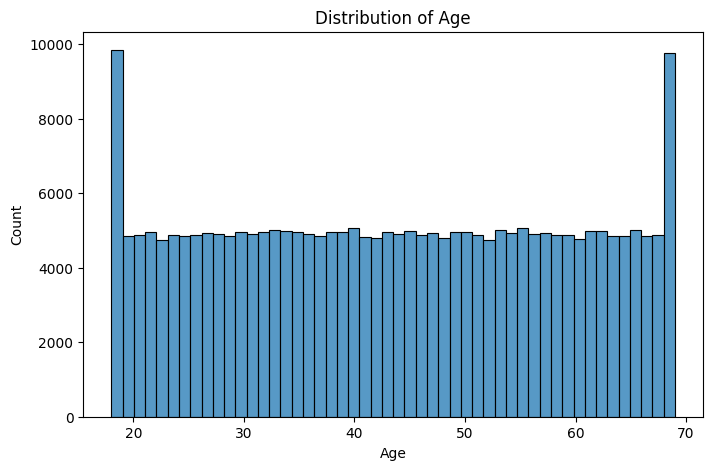

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=50, kde=False)
plt.title("Distribution of Age")
plt.show()

In [18]:
# Count frequency of each age
age_counts = df['Age'].value_counts().sort_index()

print(age_counts)


Age
18    4884
19    4963
20    4861
21    4889
22    4970
23    4740
24    4869
25    4840
26    4891
27    4945
28    4906
29    4865
30    4954
31    4908
32    4969
33    5022
34    4987
35    4961
36    4906
37    4856
38    4955
39    4973
40    5056
41    4815
42    4803
43    4965
44    4906
45    4985
46    4887
47    4931
48    4810
49    4952
50    4949
51    4876
52    4748
53    5010
54    4921
55    5064
56    4902
57    4925
58    4883
59    4871
60    4772
61    4982
62    4999
63    4862
64    4840
65    5027
66    4841
67    4876
68    4958
69    4817
Name: count, dtype: int64


In [19]:
# import pandas as pd

# df = pd.read_csv("Loan_default.csv")

for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head(10))  # show top 10 values


--- Age ---
Age
55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
Name: count, dtype: int64

--- Income ---
Income
117102    10
69492     10
121985    10
101884     9
31741      9
126175     9
148090     9
118191     9
77704      9
137221     9
Name: count, dtype: int64

--- LoanAmount ---
LoanAmount
221949    8
133724    8
95419     8
183627    7
235258    7
29290     7
173224    7
239944    7
125787    7
111464    7
Name: count, dtype: int64

--- CreditScore ---
CreditScore
630    528
445    521
829    520
753    519
670    515
643    514
347    514
775    512
362    510
573    508
Name: count, dtype: int64

--- MonthsEmployed ---
MonthsEmployed
56     2227
26     2223
45     2220
107    2207
79     2198
17     2198
118    2196
94     2194
34     2194
28     2190
Name: count, dtype: int64

--- NumCreditLines ---
NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

--- InterestRate ---
Intere

## 1. For categorical columns (BEST starting point)
This shows which category leans more toward default (1) or non-default (0).

In [20]:
cat_cols = [
    "Education", "EmploymentType", "MaritalStatus",
    "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"
]

for col in cat_cols:
    print(f"\n=== {col} ===")
    print(pd.crosstab(df[col], df["Default"], normalize="index"))



=== Education ===
Default             0         1
Education                      
Bachelor's   0.878989  0.121011
High School  0.871211  0.128789
Master's     0.891283  0.108717
PhD          0.894140  0.105860

=== EmploymentType ===
Default                0         1
EmploymentType                    
Full-time       0.905366  0.094634
Part-time       0.880348  0.119652
Self-employed   0.885380  0.114620
Unemployed      0.864471  0.135529

=== MaritalStatus ===
Default               0         1
MaritalStatus                    
Divorced       0.874672  0.125328
Married        0.896028  0.103972
Single         0.880876  0.119124

=== HasMortgage ===
Default             0         1
HasMortgage                    
No           0.876549  0.123451
Yes          0.891194  0.108806

=== HasDependents ===
Default               0         1
HasDependents                    
No             0.872756  0.127244
Yes            0.894976  0.105024

=== LoanPurpose ===
Default             0         1
L

## 2. For numeric columns (bin them first)
Numeric values need binning, otherwise it’s messy.

In [21]:
df["CreditScore_bin"] = pd.cut(
    df["CreditScore"],
    bins=[300, 580, 670, 740, 850],
    labels=["Poor", "Fair", "Good", "Very Good"]
)

pd.crosstab(df["CreditScore_bin"], df["Default"], normalize="index")

Default,0,1
CreditScore_bin,,
Poor,0.875353,0.124647
Fair,0.885761,0.114239
Good,0.893720,0.106280
Very Good,0.898328,0.101672


## 3. Quick “Default rate” per column value (very clean)

This gives a single powerful metric.

### Interpretation 👇

0.18 = 18% of unemployed borrowers defaulted

0.14 = 14% of part-time borrowers defaulted

0.07 = 7% of full-time borrowers defaulted

👉 Higher value = higher probability of Default = 1

In [22]:
for col in cat_cols:
    print(f"\n{col}")
    print(df.groupby(col)["Default"].mean().sort_values(ascending=False))



Education
Education
High School    0.128789
Bachelor's     0.121011
Master's       0.108717
PhD            0.105860
Name: Default, dtype: float64

EmploymentType
EmploymentType
Unemployed       0.135529
Part-time        0.119652
Self-employed    0.114620
Full-time        0.094634
Name: Default, dtype: float64

MaritalStatus
MaritalStatus
Divorced    0.125328
Single      0.119124
Married     0.103972
Name: Default, dtype: float64

HasMortgage
HasMortgage
No     0.123451
Yes    0.108806
Name: Default, dtype: float64

HasDependents
HasDependents
No     0.127244
Yes    0.105024
Name: Default, dtype: float64

LoanPurpose
LoanPurpose
Business     0.123260
Auto         0.118814
Education    0.118381
Other        0.117885
Home         0.102348
Name: Default, dtype: float64

HasCoSigner
HasCoSigner
No     0.128661
Yes    0.103601
Name: Default, dtype: float64


## 4. For continuous variables (quantiles = best)
Example: LoanAmount

💡 Shortcut insight:
- pd.qcut → splits into equal-sized groups (quartiles).
- groupby(...)[target].mean() → gives the average default rate per group.
- observed=True → avoids the warning and only shows bins that actually exist.

- observed=False → includes all possible category levels, even if they don’t appear in the data.
- observed=True → only includes the categories that actually appear in the data.



PTR
- By default, groupby has observed=False for categorical groupers.
- In future versions, the default will change to observed=True.

In [23]:
df["LoanAmount_q"] = pd.qcut(df["LoanAmount"], 4, labels=["Low", "Mid", "High", "Very High"])

# df.groupby("LoanAmount_q")["Default"].mean()
df.groupby("LoanAmount_q", observed=True)["Default"].mean()


LoanAmount_q
Low          0.082459
Mid          0.102481
High         0.123535
Very High    0.156038
Name: Default, dtype: float64

Interpretation:LoanAmount

Default rate increases monotonically with loan amount

Higher exposure → higher repayment stress

Model feasibility

✅ Very good

Clear risk gradient

Tree models love this

Works well with DTI & Income

📌 Conclusion: Keep as-is, high predictive power

In [24]:
df["DTIRatio_q"] = pd.qcut(df["DTIRatio"], 4, labels=["Low", "Mid", "High", "Very High"])

df.groupby("DTIRatio_q", observed=True)["DTIRatio"].mean()

DTIRatio_q
Low          0.202368
Mid          0.404839
High         0.605157
Very High    0.802407
Name: DTIRatio, dtype: float64

DTI
Almost linear increase in default risk

DTI is the strongest credit stress indicator

Model feasibility

🔥 Excellent

Near-perfect monotonicity

Will appear in top splits of DT/RF/XGB

📌 Conclusion: One of your most important features

In [25]:
df["Income_q"] = pd.qcut(df["Income"], 4, labels=["Low", "Mid", "High", "Very High"])

df.groupby("Income_q", observed=True)["Default"].mean()

Income_q
Low          0.173802
Mid          0.105378
High         0.095130
Very High    0.090203
Name: Default, dtype: float64

Income:
Higher income → lower default probability

Effect tapers off at higher income levels

Model feasibility

✅ Good

Inverse relationship

Useful in interaction with LoanAmount

📌 Conclusion: Keep; moderate-to-strong signal

In [26]:
df["InterestRate_q"] = pd.qcut(df["InterestRate"], 4, labels=["Low", "Mid", "High", "Very High"])

df.groupby("InterestRate_q", observed=True)["Default"].mean()

InterestRate_q
Low          0.065721
Mid          0.094395
High         0.129551
Very High    0.174966
Name: Default, dtype: float64

InterestRate:
Higher interest → higher EMI burden

Also reflects lender’s perceived risk

Model feasibility

🔥 Excellent

Clean monotonic pattern

High importance in boosting models

📌 Conclusion: Core predictor

In [27]:
df["LoanTerm_q"] = pd.qcut(df["LoanTerm"], 4, labels=["Low", "Mid", "High", "Very High"])

df.groupby("LoanTerm_q", observed=True)["Default"].mean()

LoanTerm_q
Low          0.116127
Mid          0.115685
High         0.115741
Very High    0.116961
Name: Default, dtype: float64

Almost no variation

Loan duration alone does not affect default

Model feasibility

⚠️ Low standalone value

Tree models may ignore it

But still useful in interaction (e.g., long term + high loan)

📌 Conclusion: Keep, but don’t expect high importance

#### Conclusion
Feature	        Risk Pattern	Model Value

DTIRatio	    Very Strong	    🔥🔥🔥

InterestRate	Strong	        🔥🔥

LoanAmount	    Strong	        🔥🔥

Income	        Moderate     	🔥

LoanTerm	    Weak alone

## 5. One-liner correlation sanity check (optional)
⚠️ Don’t overtrust correlation — trees don’t rely on linear relationships.

In [28]:
df.corr(numeric_only=True)["Default"].sort_values(ascending=False)


Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
CreditScore      -0.034166
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
Name: Default, dtype: float64

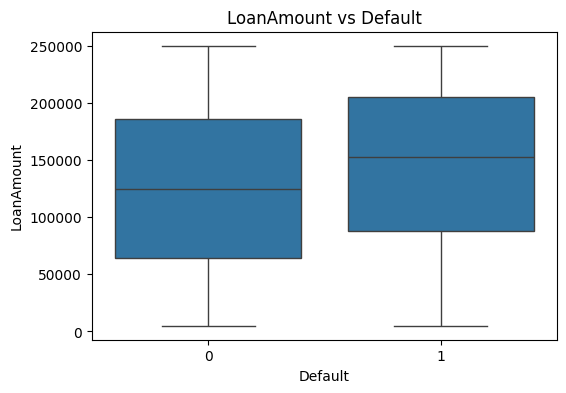

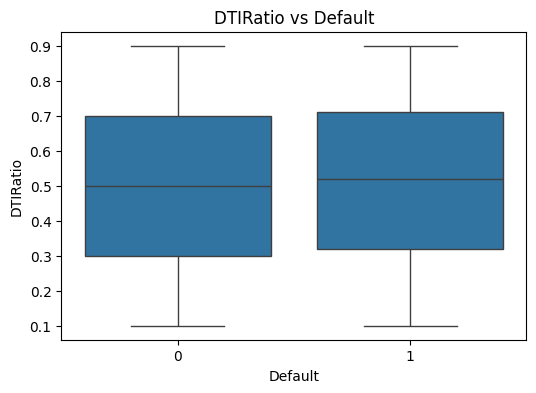

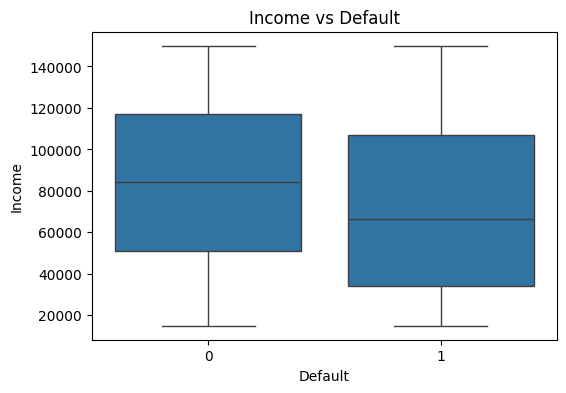

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['LoanAmount', 'DTIRatio', 'Income']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Default', y=col, data=df)
    plt.title(f'{col} vs Default')
    plt.show()


C:\Users\suresh\Desktop\Jupiter\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


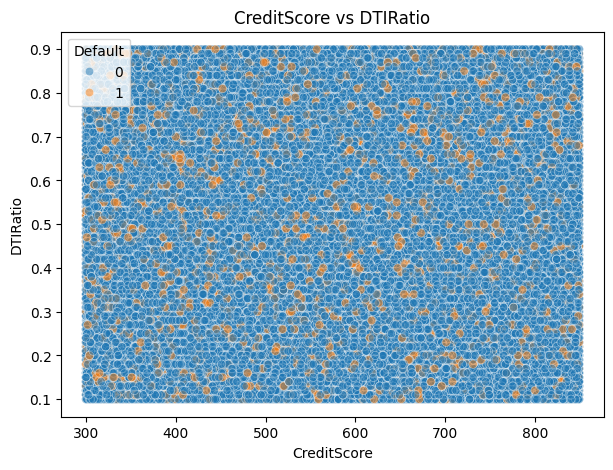

In [31]:

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='CreditScore',
    y='DTIRatio',
    hue='Default',
    alpha=0.5
)
plt.title('CreditScore vs DTIRatio')
plt.show()


C:\Users\suresh\Desktop\Jupiter\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


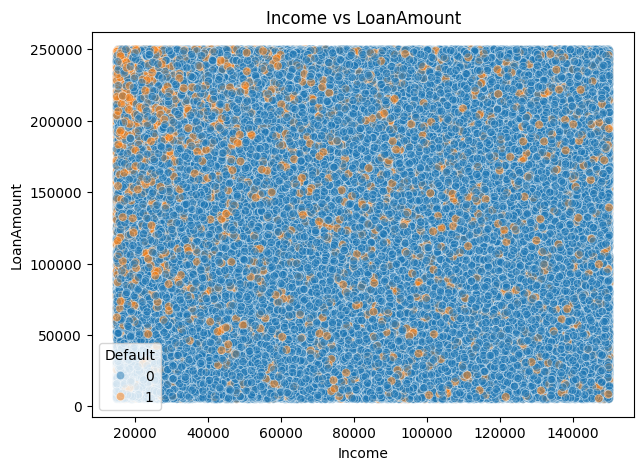

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Income',
    y='LoanAmount',
    hue='Default',
    alpha=0.5
)
plt.title('Income vs LoanAmount')
plt.show()


C:\Users\suresh\Desktop\Jupiter\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


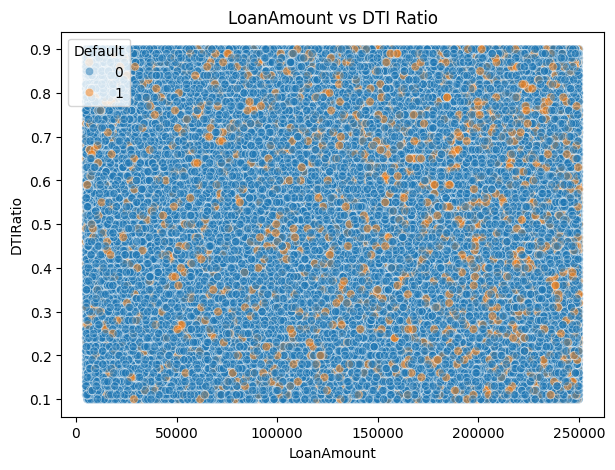

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='LoanAmount',
    y='DTIRatio',
    hue='Default',
    alpha=0.5
)
plt.title('LoanAmount vs DTI Ratio')
plt.show()


C:\Users\suresh\Desktop\Jupiter\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


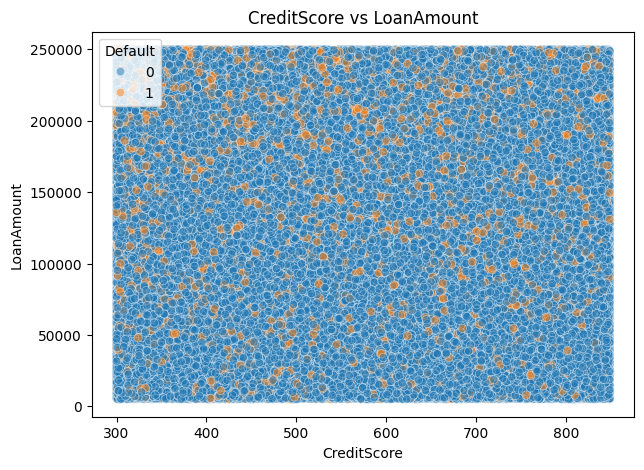

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='CreditScore',
    y='LoanAmount',
    hue='Default',
    alpha=0.5
)
plt.title('CreditScore vs LoanAmount')
plt.show()


## Loading dataset again in df1. Applying Encoding and Building Model

In [29]:
df1= pd.read_csv('Loan_default.csv')

In [30]:
df1 = df1.drop('LoanID',axis=1)

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load your data (Assuming df is already loaded from 'Loan_default.csv')
# df = pd.read_csv('Loan_default.csv').drop('LoanID', axis=1)

# 2. Label Encode the Target Variable (Default)
# This ensures the target is in the integer format (0 and 1) required by most models
le = LabelEncoder()
df['Default'] = le.fit_transform(df1['Default'])

# 3. One-Hot Encoding for Categorical Columns
# We use drop_first=True to avoid multi-collinearity (the dummy variable trap)
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus', 
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
]
df_final = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

# Note: Scaling is skipped not necessary. 
# Numeric columns like Income, LoanAmount, and Age remain in their original units.

# 4. Display the first few rows of the processed data
print("Shape of processed data:", df_final.shape)
print(df_final.head())

Shape of processed data: (255347, 25)
   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Default  ...  EmploymentType_Unemployed  \
0         15.23        36      0.44        0  ...                      False   
1          4.81        60      0.68        0  ...                      False   
2         21.17        24      0.31        1  ...                       True   
3          7.07        24      0.23        0  ...                      False   
4          6.51        48      0.73        0  ...                       True   

   MaritalStatus_Married  Mari

In [32]:
df_final.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Default                       255347 non-null  int64  
 10  Education_High School         255347 non-null  bool   
 11  Education_Master's            255347 non-null  bool   
 12  Education_PhD                 255347 non-nul

### RandomForestClassifier, with OneHotEncoding

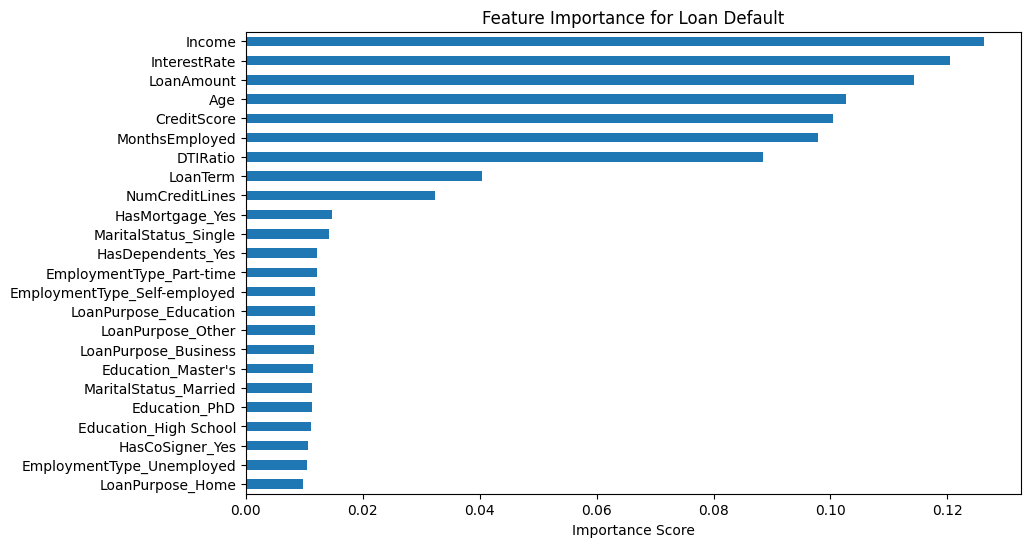

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Prepare the data
df_model = df_final.copy()
# le = LabelEncoder()

# # Encode categorical columns
# categorical_cols = df_model.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     df_model[col] = le.fit_transform(df_model[col])

# 2. Train a quick Random Forest
X = df_model.drop('Default', axis=1)
y = df_model['Default']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 3. Plot Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance for Loan Default')
plt.xlabel('Importance Score')
plt.show()

### XGboost without OneHotEncoding

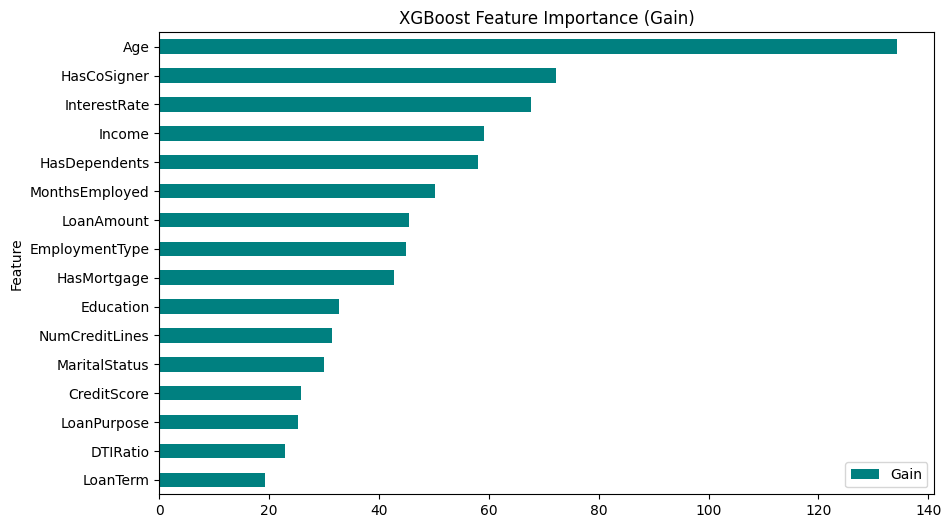

In [44]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Preprocessing
df_xgb = df1.copy()
le = LabelEncoder()
cat_cols = df_xgb.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_xgb[col] = le.fit_transform(df_xgb[col])

X = df_xgb.drop('Default', axis=1)
y = df_xgb['Default']

# 2. Train XGBoost
# We use scale_pos_weight because only 11.6% of people defaulted
model = xgb.XGBClassifier(scale_pos_weight=7.5, random_state=42)
model.fit(X, y)

# 3. Get Feature Importance by 'Gain'
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(list(importance_gain.items()), columns=['Feature', 'Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=True)

# 4. Plot
importance_df.plot(kind='barh', x='Feature', y='Gain', figsize=(10, 6), color='teal')
plt.title('XGBoost Feature Importance (Gain)')
plt.show()

### XGboost with OneHotEncoding

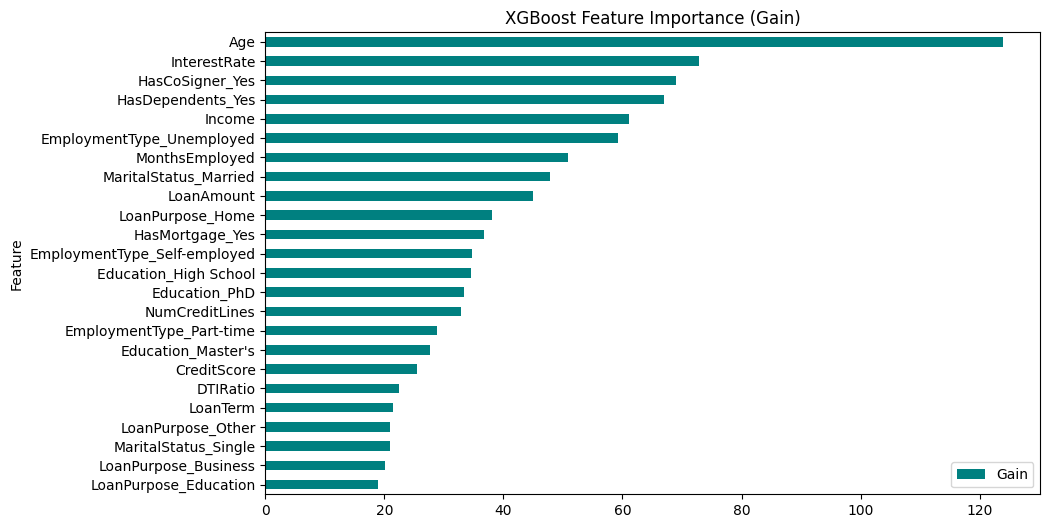

In [50]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Preprocessing
df_xgb = df_final.copy()

X = df_xgb.drop('Default', axis=1)
y = df_xgb['Default']

# 2. Train XGBoost
# We use scale_pos_weight because only 11.6% of people defaulted
model = xgb.XGBClassifier(scale_pos_weight=7.5, random_state=42)
model.fit(X, y)

# 3. Get Feature Importance by 'Gain'
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(list(importance_gain.items()), columns=['Feature', 'Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=True)

# 4. Plot
importance_df.plot(kind='barh', x='Feature', y='Gain', figsize=(10, 6), color='teal')
plt.title('XGBoost Feature Importance (Gain)')
plt.show()

### Naive_bayes with OneHotEncoding

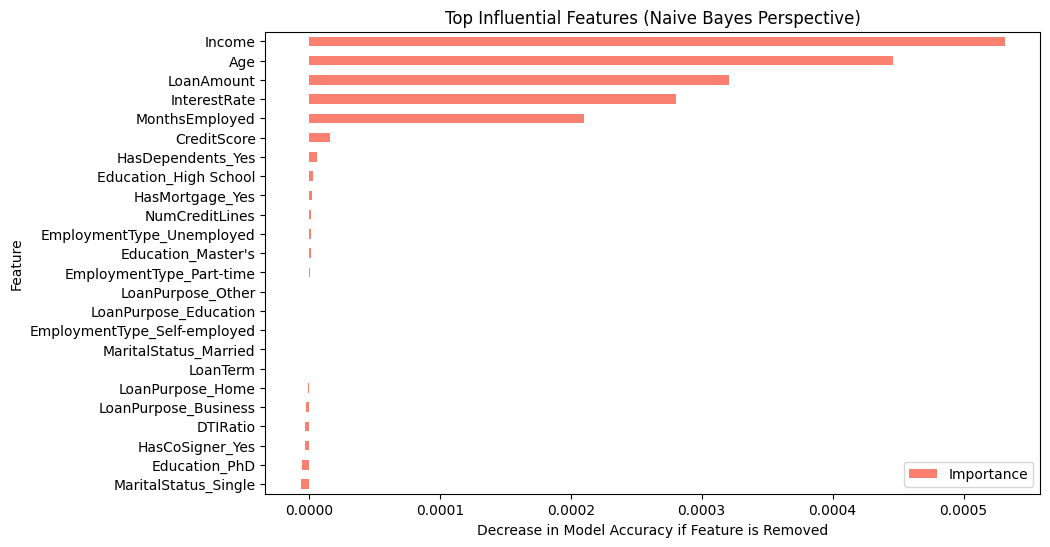

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepare the data (using the df_final you created with OHE)
X = df_final.drop('Default', axis=1)
y = df_final['Default']

# 2. Train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X, y)

# 3. Calculate Permutation Importance
# This finds how much the model's accuracy drops when a single column is "shuffled"
result = permutation_importance(nb_model, X, y, n_repeats=10, random_state=42)

# 4. Organize and Plot the insights
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=True)

importance_df.plot(kind='barh', x='Feature', y='Importance', color='salmon', figsize=(10, 6))
plt.title('Top Influential Features (Naive Bayes Perspective)')
plt.xlabel('Decrease in Model Accuracy if Feature is Removed')
plt.show()

### Decision Tree: Balance Class, OneHotEncoding

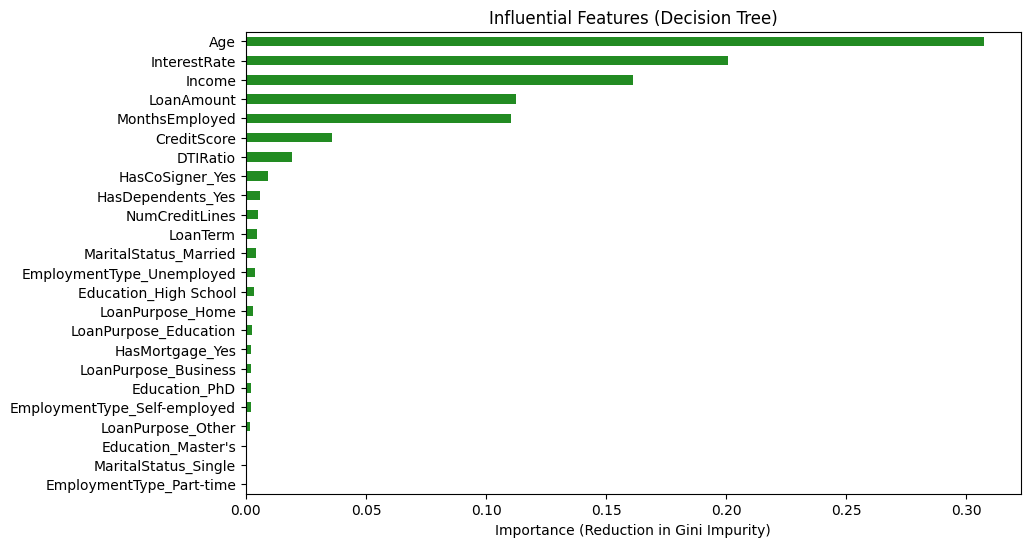

In [54]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# 1. Prepare data (using df_final from our previous step)
X = df_final.drop('Default', axis=1)
y = df_final['Default']

# 2. Train a Decision Tree
# We limit max_depth to 10 to prevent overfitting and keep insights clean
# class_weight='balanced' helps the model focus on the 11% who defaulted
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
dt_model.fit(X, y)

# 3. Get Feature Importance (Gini Importance)
dt_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# 4. Plot the top 10 features
# dt_importances.tail(10).plot(kind='barh', figsize=(10, 6), color='forestgreen')
dt_importances.plot(kind='barh', figsize=(10, 6), color='forestgreen')
# plt.title('Top 10 Most Influential Features (Decision Tree)')
plt.title('Influential Features (Decision Tree)')
plt.xlabel('Importance (Reduction in Gini Impurity)')
plt.show()

### Final: Description of all these model:

1. Decision Tree (The Foundation)
How it works: It creates a flowchart-like structure, splitting data at "nodes" based on the feature that reduces uncertainty (Gini Impurity or Entropy) the most.

Encoding: Works with Label Encoding, but One-Hot Encoding (OHE) is safer for nominal data (like LoanPurpose) to prevent the model from thinking "Home" is mathematically "greater than" "Auto."

Scaling: Not needed. Trees only care about the order of values, not their magnitude.

Fine-Tuning:

max_depth: Controls how deep the tree goes. Too deep = overfitting.

min_samples_split: Minimum samples required to split a node. Higher values prevent the model from learning "noise."

class_weight='balanced': Critical for your data since only 11% defaulted.


2. XGBoost (The Powerhouse)
How it works: It is an "Ensemble" of many small Decision Trees. Each new tree focuses on correcting the errors made by the previous trees.

Encoding: One-Hot Encoding is standard. XGBoost also has a native enable_categorical=True mode, but OHE is more widely compatible.

Scaling: Not needed.

Fine-Tuning:

n_estimators: Number of trees. Use "Early Stopping" to find the sweet spot.

learning_rate (eta): How much each tree contributes. Lower values (0.01 - 0.1) are better but require more trees.

scale_pos_weight: Set this to roughly 7.5 (Ratio of 0s to 1s in your data) to help the model identify defaults.

subsample and colsample_bytree: Randomly picks a fraction of data/columns for each tree to prevent overfitting.


3. Naive Bayes (The Probabilistic)
How it works: It uses Bayes' Theorem to calculate the probability of a default given the features, assuming every feature is independent of the others.

Encoding: One-Hot Encoding is required for categorical data.

Scaling: Technically not required, but because it assumes features follow a normal (Gaussian) distribution, extreme outliers can confuse it.

Fine-Tuning: There are very few hyperparameters. The main one is var_smoothing, which helps stable the calculation when probabilities are near zero.

### Feature conversion Tips:
1. Feature Conversion for Decision Trees
Decision Trees are "greedy" learners; they look for a single point to split the data.

Discretization (Binning): * Why: A tree might struggle to find the "perfect" age. By converting Age into bins (e.g., Young, Middle-Aged, Senior), you create a clearer "step function" for the tree.

Action: Use pd.cut(df['Age'], bins=[18, 30, 45, 60, 70]).

Target Encoding (Alternative to OHE):

Why: If you have a column with many categories, One-Hot Encoding makes the tree very sparse and shallow. Target Encoding replaces a category (like LoanPurpose) with the average default rate for that purpose.

Action: Replace Education values with the percentage of people in that education level who defaulted.

Avoid Scaling: Trees are invariant to scale. 
Converting Income from dollars to a 0-1 scale changes nothing for a tree

2. Feature Conversion for XGBoostXGBoost is an ensemble of trees, so it shares the "tree logic" but is much more sensitive to    fine details.Interaction Features (Crucial):Why: XGBoost performs better when you explicitly calculate relationships. For      example, a high LoanAmount is fine if Income is high, but risky if Income is low.Action:
 Create a new column: df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['Income'].Log Transformations:
 Why: While not strictly required for trees, reducing the "spread" of highly skewed columns (like Income or LoanAmount) can          help the boosting process converge faster.
 Action: Use np.log1p(df['Income']).
 Handling Imbalance via Weights:Why: Your data has an 11% default rate.
 Action: Calculate the ratio of negative to positive cases ($225k / 29k \approx 7.5$) and set scale_pos_weight=7.5 in the               model parameters. This effectively "multiplies" the importance of the default cases.


3. Feature Conversion for Naive BayesNaive Bayes is the "pickiest" model because it makes strong mathematical assumptions.Gaussian Transformation (Normalization):Why: GaussianNB assumes your numeric features look like a Bell Curve (Normal Distribution). Features like Income often have "long tails," which confuses the model.Action: Use PowerTransformer from Scikit-Learn to force your numeric features into a normal distribution.Removing Correlated Features:Why: Naive Bayes assumes all features are independent. If MonthsEmployed and Age are highly correlated, the model "double-counts" that evidence, which leads to overconfident (and wrong) predictions.Action: Check your correlation matrix. If two features have a correlation $> 0.7$, consider dropping one of them.One-Hot Encoding is Mandatory: Unlike trees, Naive Bayes cannot handle Label Encoded categories correctly because it will try to calculate a "mean" of the category numbers (e.g., the "average" of Education levels 1 and 3 is 2), which is mathematically meaningless.


## Model building:

### 1. Random Forest:

In [77]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Default', axis=1)
y = df_final['Default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # very important for loan default
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [35]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]


In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8845897787350695


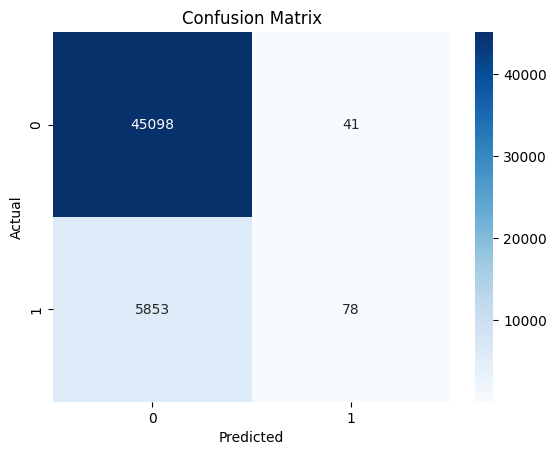

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.66      0.01      0.03      5931

    accuracy                           0.88     51070
   macro avg       0.77      0.51      0.48     51070
weighted avg       0.86      0.88      0.83     51070



### XGBoost

In [39]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split


In [41]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
scale_pos_weight



np.float64(7.61128909872692)

In [42]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [45]:
y_pred_xg = xgb_model.predict(X_test)
y_pred_proba_xg = xgb_model.predict_proba(X_test)[:, 1]


In [47]:
print(classification_report(y_test, y_pred_xg))


              precision    recall  f1-score   support

           0       0.94      0.70      0.80     45139
           1       0.23      0.68      0.34      5931

    accuracy                           0.70     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.70      0.75     51070



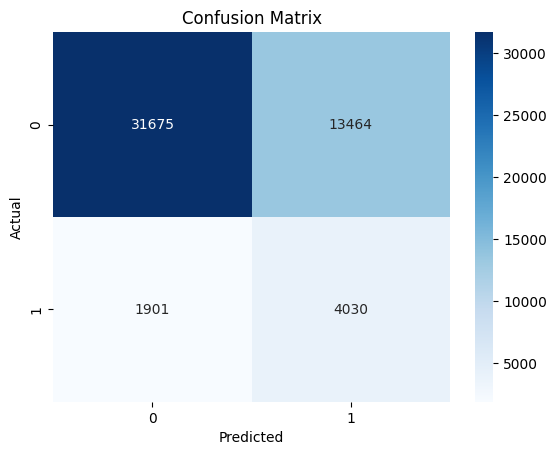

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xg)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
# df_final.info()

In [57]:
# Drop LoanTerm
# Step 1: Create a deep copy
df_final_v1 = df_final.copy()

df_final_v1 = df_final.drop(columns=[
    'LoanTerm',
    'LoanPurpose_Business',
    'LoanPurpose_Education',
    'LoanPurpose_Home',
    'LoanPurpose_Other'
],axis=1)




In [69]:
# df_final_v1.info()

In [70]:
# df_final_v1['Age'].describe()


In [71]:
# df_final_v1['Age'].value_counts().sort_index().head(10)


In [72]:
# df_final_v1['Age'].value_counts().sort_index().tail(10)

In [64]:
age_bins = [17, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

df_final_v1['Age_Bin'] = pd.cut(
    df_final_v1['Age'],
    bins=age_bins,
    labels=age_labels
)


In [73]:
# df_final_v1['Age_Bin'].value_counts()

In [74]:
# df_final_v1.groupby('Age_Bin')['Default'].mean()


In [67]:
df_final_v1 = pd.get_dummies(df_final_v1, columns=['Age_Bin'], drop_first=True)
df_final_v1 = df_final_v1.drop(columns=['Age'])  # drop raw Age

In [68]:
df_final_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Income                        255347 non-null  int64  
 1   LoanAmount                    255347 non-null  int64  
 2   CreditScore                   255347 non-null  int64  
 3   MonthsEmployed                255347 non-null  int64  
 4   NumCreditLines                255347 non-null  int64  
 5   InterestRate                  255347 non-null  float64
 6   DTIRatio                      255347 non-null  float64
 7   Default                       255347 non-null  int64  
 8   Education_High School         255347 non-null  bool   
 9   Education_Master's            255347 non-null  bool   
 10  Education_PhD                 255347 non-null  bool   
 11  EmploymentType_Part-time      255347 non-null  bool   
 12  EmploymentType_Self-employed  255347 non-nul

In [78]:
from sklearn.model_selection import train_test_split

X_v1 = df_final_v1.drop('Default', axis=1)
y_v1 = df_final_v1['Default']

X_trainv1, X_testv1, y_trainv1, y_testv1 = train_test_split(
    X_v1, y_v1, test_size=0.2, random_state=42, stratify=y
)

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_v1 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # very important for loan default
)

rf_v1.fit(X_trainv1, y_trainv1)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [84]:
y_predv1 = rf_v1.predict(X_testv1)
y_pred_probav1 = rf_v1.predict_proba(X_testv1)[:, 1]

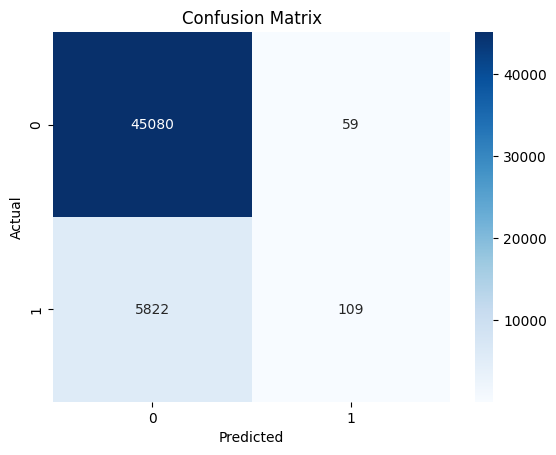

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_v1 = confusion_matrix(y_testv1, y_predv1)

sns.heatmap(cm_v1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_testv1, y_predv1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.65      0.02      0.04      5931

    accuracy                           0.88     51070
   macro avg       0.77      0.51      0.49     51070
weighted avg       0.86      0.88      0.83     51070



## Smotting and testing again

In [87]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


Apply SMOTE on training set only

Important: Only on training set — test set must remain untouched.

In [88]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_trainv1, y_trainv1)

print("Before SMOTE:", y_trainv1.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Default
0    180555
1     23722
Name: count, dtype: int64
After SMOTE: Default
0    180555
1    180555
Name: count, dtype: int64


#### Train Random Forest on SMOTEd data

In [89]:
rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_smote.fit(X_train_smote, y_train_smote)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [90]:
y_pred_smote = rf_smote.predict(X_testv1)

print(classification_report(y_testv1, y_pred_smote))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93     45139
           1       0.28      0.10      0.15      5931

    accuracy                           0.87     51070
   macro avg       0.59      0.53      0.54     51070
weighted avg       0.82      0.87      0.84     51070



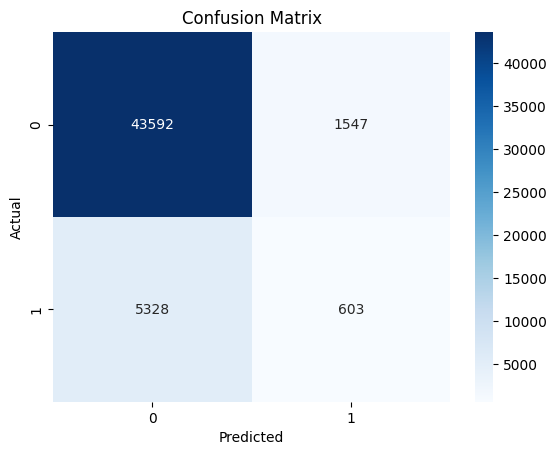

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_v11 = confusion_matrix(y_testv1, y_pred_smote)

sns.heatmap(cm_v11, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
df_final_v1.sample(4)

,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Default,Education_High School,Education_Master's,...,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes,Age_Bin_26-35,Age_Bin_36-45,Age_Bin_46-55,Age_Bin_56-65,Age_Bin_65+
88747,44754,112809,833,84,4,12.86,0.41,0,False,False,...,False,False,False,False,True,True,False,False,False,False
236512,118297,180226,701,40,2,8.81,0.48,0,True,False,...,False,False,False,True,False,True,False,False,False,False
223129,36236,217125,650,24,4,3.23,0.41,0,False,False,...,False,True,True,False,False,False,True,False,False,False
114280,75818,115957,623,35,4,6.47,0.42,0,False,False,...,True,False,True,False,False,False,False,True,False,False


In [93]:
import numpy as np
df_final_v2 = df_final_v1.copy()

# Ratio: income per unit loan
df_final_v2['Income_to_Loan'] = df_final_v2['Income'] / df_final_v2['LoanAmount']
df_final_v2['Income_to_Loan'] = df_final_v2['Income_to_Loan'].clip(upper=10)  # cap extreme values


# Optional: drop raw Income and LoanAmount if only using engineered features
df_final_v2 = df_final_v2.drop(columns=['Income', 'LoanAmount'])


In [100]:
df_final_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CreditScore                   255347 non-null  int64  
 1   MonthsEmployed                255347 non-null  int64  
 2   NumCreditLines                255347 non-null  int64  
 3   InterestRate                  255347 non-null  float64
 4   DTIRatio                      255347 non-null  float64
 5   Default                       255347 non-null  int64  
 6   Education_High School         255347 non-null  bool   
 7   Education_Master's            255347 non-null  bool   
 8   Education_PhD                 255347 non-null  bool   
 9   EmploymentType_Part-time      255347 non-null  bool   
 10  EmploymentType_Self-employed  255347 non-null  bool   
 11  EmploymentType_Unemployed     255347 non-null  bool   
 12  MaritalStatus_Married         255347 non-nul

In [101]:
from sklearn.model_selection import train_test_split

X_v2 = df_final_v2.drop('Default', axis=1)
y_v2 = df_final_v2['Default']

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    X_v2, y_v2, test_size=0.2, random_state=42, stratify=y_v2
)


In [102]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_v2, y_train_v2 = smote.fit_resample(X_train_v2, y_train_v2)

# Check balance
print("Before SMOTE:\n", y_train_v2.value_counts())
print("After SMOTE:\n", y_train_v2_smote.value_counts())


Before SMOTE:
 Default
0    180555
1    180555
Name: count, dtype: int64
After SMOTE:
 Default
0    180555
1    180555
Name: count, dtype: int64


In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb_model_v2 = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model_v2.fit(X_train_v2, y_train_v2)


C:\Users\suresh\Desktop\Jupiter\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:52:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [107]:
y_pred_v2 = xgb_model_v2.predict(X_test_v2)

print(classification_report(y_test_v2, y_pred_v2))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93     45139
           1       0.32      0.15      0.20      5931

    accuracy                           0.87     51070
   macro avg       0.61      0.55      0.56     51070
weighted avg       0.83      0.87      0.84     51070



In [106]:
y_test_v2.info()

<class 'pandas.core.series.Series'>
Index: 51070 entries, 211648 to 95842
Series name: Default
Non-Null Count  Dtype
--------------  -----
51070 non-null  int64
dtypes: int64(1)
memory usage: 798.0 KB


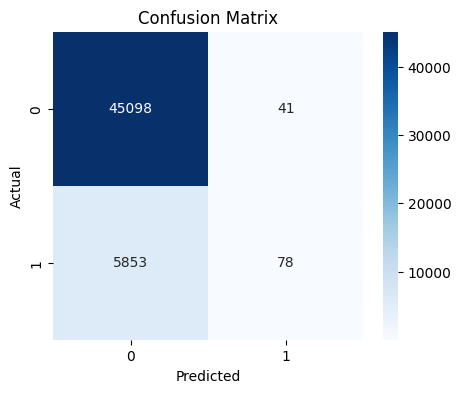

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
